In [15]:
# Preliminaries
from dietician_monitor import G, Patient, Consultation, patch_resource, get_monitor
from plotnine import *

Note that import caches classes (and variables, functions) defined in the imported package. This has two consequences:
1. Changes to the code-base of imported module will not reflect in the Jupyter notebook simply by re-running the import statement. Either restart the Jupyter notebook's kernel or explicitly reload.
2. The class G has class-level variables including arrays that are appended to. State-changes will be persisted between runs.

In [16]:
c = Consultation()
G.simulation_horizon = 30
c.monitor_resource(['dietician'])
res = c.run_once()

Patient 1 entered the queue at 0.00
Patient 1 entered consultation at 0.00, having waited 0.00
Patient 2 entered the queue at 1.20
Patient 1 exited at 1.28, having spent 1.28 in clinic.
Patient 2 entered consultation at 1.28, having waited 0.08
Patient 2 exited at 7.42, having spent 6.22 in clinic.
Patient 3 entered the queue at 19.97
Patient 3 entered consultation at 19.97, having waited 0.00
Patient 4 entered the queue at 21.58
Patient 5 entered the queue at 23.82
Patient 6 entered the queue at 24.02
Patient 3 exited at 27.24, having spent 7.27 in clinic.
Patient 4 entered consultation at 27.24, having waited 5.66


In [17]:
# Plot
print(G.resource_monitor)
print(G.arrived)
#x_dietcian, y_dietician = list(zip(*G.resource_monitor["dietician"]))

{'dietician': [(0, 1, 0), (1.1976077539380288, 1, 1), (1.2783855095725627, 0, 1), (7.416676387101754, 0, 0), (19.96875883909738, 1, 0), (21.580815357539702, 1, 1), (23.81631814448121, 1, 2), (24.021309413793123, 1, 3), (27.242963959324133, 0, 3)]}
[0, 1.1976077539380288, 19.96875883909738, 21.580815357539702, 23.81631814448121, 24.021309413793123]


In [18]:
c = Consultation()
G.simulation_horizon = 12
c.monitor_resource(['dietician'])
res = c.run_once(proc_monitor=True)

Patient 1 entered the queue at 0.00
Patient 1 entered consultation at 0.00, having waited 0.00
Patient 1 exited at 1.08, having spent 1.08 in clinic.
Patient 2 entered the queue at 3.03
Patient 2 entered consultation at 3.03, having waited 0.00
Patient 3 entered the queue at 4.74
Patient 4 entered the queue at 9.68
Patient 2 exited at 10.48, having spent 7.45 in clinic.
Patient 3 entered consultation at 10.48, having waited 5.73
Patient 3 exited at 11.57, having spent 6.82 in clinic.
Patient 4 entered consultation at 11.57, having waited 1.89
Patient 5 entered the queue at 11.80


In [19]:
print(G.resource_monitor)
print(G.resource_utilization)

{'dietician': [(0, 1, 0), (1.0764715253505566, 0, 0), (3.0323742910027605, 1, 0), (4.744330654021207, 1, 1), (9.675163003637607, 1, 2), (10.478949324923537, 0, 2), (11.567944007303153, 0, 1), (11.795113091072627, 1, 1)]}
{'dietician': [(0, 0, 0), (0.3, 1, 0), (0.6, 1, 0), (0.8999999999999999, 1, 0), (1.2, 0, 0), (1.5, 0, 0), (1.8, 0, 0), (2.1, 0, 0), (2.4, 0, 0), (2.6999999999999997, 0, 0), (2.9999999999999996, 0, 0), (3.2999999999999994, 1, 0), (3.599999999999999, 1, 0), (3.899999999999999, 1, 0), (4.199999999999999, 1, 0), (4.499999999999999, 1, 0), (4.799999999999999, 1, 1), (5.099999999999999, 1, 1), (5.399999999999999, 1, 1), (5.699999999999998, 1, 1), (5.999999999999998, 1, 1), (6.299999999999998, 1, 1), (6.599999999999998, 1, 1), (6.899999999999998, 1, 1), (7.1999999999999975, 1, 1), (7.499999999999997, 1, 1), (7.799999999999997, 1, 1), (8.099999999999998, 1, 1), (8.399999999999999, 1, 1), (8.7, 1, 1), (9.0, 1, 1), (9.3, 1, 1), (9.600000000000001, 1, 1), (9.900000000000002, 1, 2

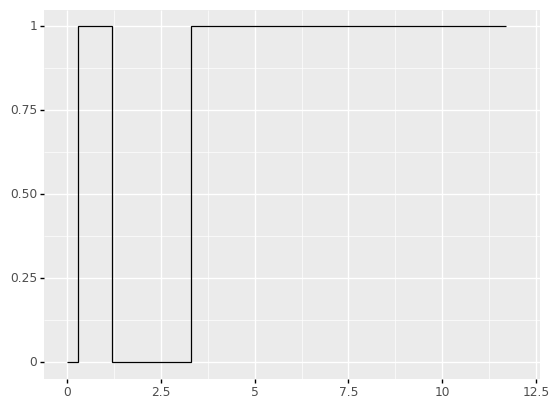

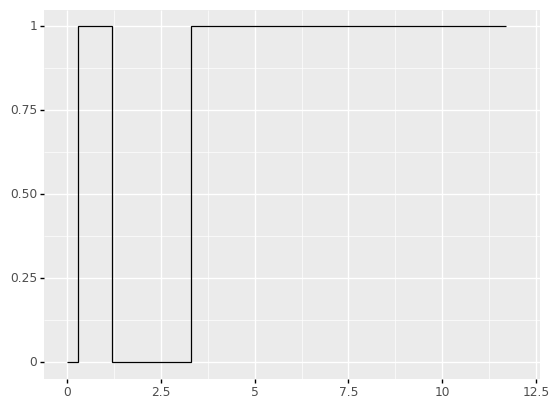

In [20]:
x_monkey, y_monkey, _ = list(zip(*G.resource_monitor["dietician"]))
x_monitr, y_monitr, _ = list(zip(*G.resource_utilization['dietician']))

pMonkey = ggplot(aes(x=x_monkey, y=y_monkey)) + geom_step() + xlim(0, G.simulation_horizon)
#ggplot.draw(pMonkey)
pMonitr = ggplot(aes(x=x_monitr, y=y_monitr)) + geom_step() + xlim(0, G.simulation_horizon)
ggplot.draw(pMonitr)

In [21]:
import simpy
env = simpy.Environment
res = simpy.Resource(env=env, capacity=1)
print(type(res))
type(res) == 'simpy.resources.resource.Resource'
isinstance(res, simpy.resources.resource.Resource)

<class 'simpy.resources.resource.Resource'>


True